In [1]:
# libraries
library(VennDiagram)
library(ggplot2)
library(ggVennDiagram)

Loading required package: grid

Loading required package: futile.logger



In [2]:
# library(svglite)

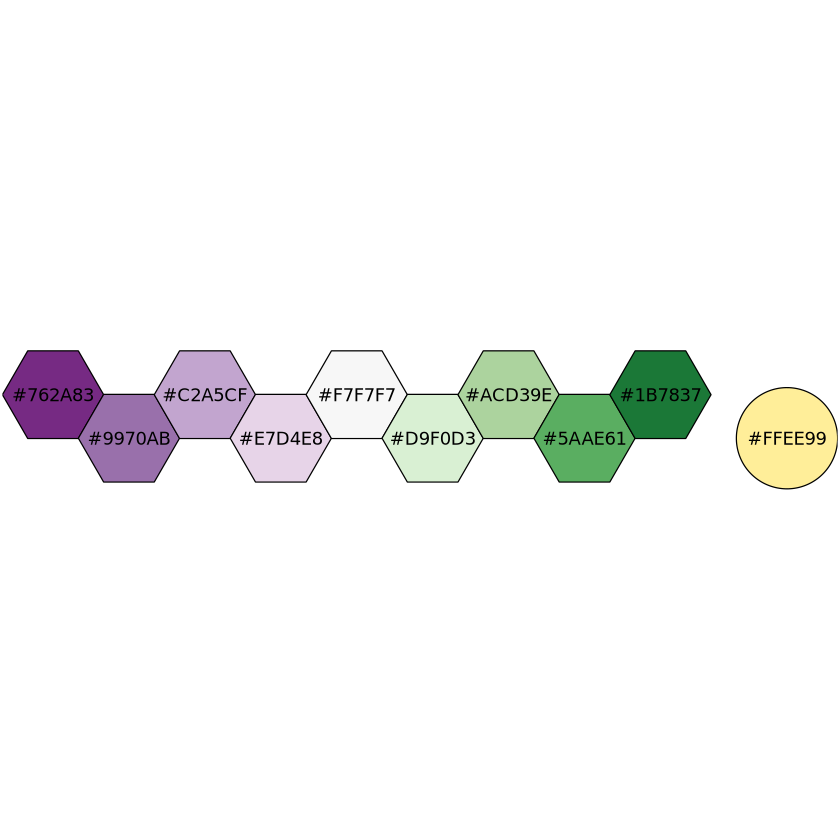

In [3]:
library(khroma)
PRGn <- color("PRGn")
plot_scheme(PRGn(9), colours = TRUE, size = 0.9)

In [4]:
input_dir <- "inputs/"

Load data.

In [5]:
genes_curated <- read.csv(paste0(input_dir,"genes_curated.csv")
                          ,check.names=FALSE
                          ,row.names = 2
                         )
genes_curated <- genes_curated[,-1]

genes_curated[genes_curated == "True"] <- TRUE
genes_curated[genes_curated == "False"] <- FALSE

genes_curated <- as.data.frame(apply(genes_curated,2,as.logical),row.names = rownames(genes_curated))

print(str(genes_curated))

'data.frame':	2294 obs. of  4 variables:
 $ community: logi  FALSE FALSE TRUE TRUE TRUE TRUE ...
 $ CPDB     : logi  FALSE TRUE FALSE TRUE TRUE TRUE ...
 $ NicheNet : logi  FALSE FALSE FALSE TRUE TRUE FALSE ...
 $ CellChat : logi  TRUE FALSE FALSE TRUE FALSE FALSE ...
NULL


In [6]:
genes_curated_predicted <- read.csv(paste0(input_dir,"genes_curated_predicted.csv")
                                    ,check.names=FALSE
                                    ,row.names = 2
                                    )
genes_curated_predicted <- genes_curated_predicted[,-1]

genes_curated_predicted[genes_curated_predicted == "True"] <- TRUE
genes_curated_predicted[genes_curated_predicted == "False"] <- FALSE

genes_curated_predicted <- as.data.frame(apply(genes_curated_predicted,2,as.logical),row.names = rownames(genes_curated_predicted))

print(str(genes_curated_predicted))

'data.frame':	2628 obs. of  4 variables:
 $ community: logi  TRUE FALSE TRUE TRUE TRUE TRUE ...
 $ CPDB     : logi  FALSE TRUE FALSE TRUE TRUE TRUE ...
 $ NicheNet : logi  FALSE FALSE FALSE TRUE TRUE TRUE ...
 $ CellChat : logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
NULL


In [7]:
pairs_curated <- read.csv(paste0(input_dir,"pairs_curated.csv")
                          ,check.names=FALSE
                          ,row.names = 2
                          )
pairs_curated <- pairs_curated[,-1]

pairs_curated[pairs_curated == "True"] <- TRUE
pairs_curated[pairs_curated == "False"] <- FALSE

pairs_curated <- as.data.frame(apply(pairs_curated,2,as.logical),row.names = rownames(pairs_curated))

print(str(pairs_curated))

'data.frame':	6693 obs. of  4 variables:
 $ community: logi  TRUE FALSE TRUE TRUE FALSE TRUE ...
 $ CPDB     : logi  FALSE FALSE TRUE FALSE TRUE TRUE ...
 $ NicheNet : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ CellChat : logi  FALSE TRUE TRUE FALSE FALSE FALSE ...
NULL


In [8]:
pairs_curated_predicted <- read.csv(paste0(input_dir,"pairs_curated_predicted.csv")
                                    ,check.names=FALSE
                                    ,row.names = 2
                                    )
pairs_curated_predicted <- pairs_curated_predicted[,-1]

pairs_curated_predicted[pairs_curated_predicted == "True"] <- TRUE
pairs_curated_predicted[pairs_curated_predicted == "False"] <- FALSE

pairs_curated_predicted <- as.data.frame(apply(pairs_curated_predicted,2,as.logical),row.names = rownames(pairs_curated_predicted))

print(str(pairs_curated_predicted))

'data.frame':	18212 obs. of  4 variables:
 $ community: logi  TRUE FALSE FALSE FALSE FALSE TRUE ...
 $ CPDB     : logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ NicheNet : logi  FALSE FALSE TRUE TRUE TRUE FALSE ...
 $ CellChat : logi  FALSE TRUE FALSE FALSE FALSE TRUE ...
NULL


# Visualize

In [9]:
plot_venn <- function(df, filename) {
    
  set1 <- which(df[["community"]] == TRUE)  
  set2 <- which(df[["CPDB"]] == TRUE)  
  set3 <- which(df[["NicheNet"]] == TRUE)  
  set4 <- which(df[["CellChat"]] == TRUE)  
  

  venn_list <- list(
    Community = set1,
    CellPhoneDB = set2,
    NicheNet = set3,
    CellChat = set4
  )

 
  set_sizes <- c(length(set1), length(set2), length(set3), length(set4))

  # Update category names with counts
  category_names <- paste0(
    c("Community", "CellPhoneDB", "NicheNet", "CellChat"), 
    "\n(", set_sizes, ")"
  )

  # Updated color scheme
  venn.plot <- venn.diagram(
    x = venn_list,
    category.names = category_names,  
    lwd = 2,
    lty = 'blank',
    fill = c("#1B7837", "#D6F0D3", "#5AAE61", "#ACD39E"), # N=5AAE61, CPDB=D6F0D3, CC=ACD39E
    cex = 0.9,  # text size for numbers inside the circles
    fontface = "italic",
    cat.cex = 1,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.055, 0.055, 0.1, 0.1),
    filename = NULL,  
    output = TRUE,
    rotation.degree = 0,
    print.mode = "raw"
  )

  # Draw the venn diagram
  grid.draw(venn.plot)

  # Save the output file
  ggsave(file=filename, plot=venn.plot, width=10, height=8, dpi = 300)
}


In [10]:
# Define the function
plot_venn_empty <- function(df, filename) {
  # Convert the TRUE/FALSE to set
  set1 <- which(df[[1]] == TRUE)
  set2 <- which(df[[2]] == TRUE)
  set3 <- which(df[[3]] == TRUE)
  set4 <- which(df[[4]] == TRUE)
  
  # Create a list of sets
  venn_list <- list(
    set1 = set1,
    set2 = set2,
    set3 = set3,
    set4 = set4
  )
  
  # Calculate the total number in each set, 
  set_sizes <- c(length(set1), length(set2), length(set3), length(set4))
  
  # We add the total number in each set to the names
  category_names <- paste0(
    c(colnames(df)[1], colnames(df)[2], colnames(df)[3], colnames(df)[4]), 
    "\n(", set_sizes, ")"
  )
  

  category_names <- c(" ", "  ","   ","    ")
    
  venn.plot <- venn.diagram(
    x = venn_list,
    category.names = category_names,  
    lwd = 2,
    lty = 'blank',
    fill = c("#1B7837", "#D9F0D3", "#5AAE61", "#ACD39E"), # N=5AAE61, CPDB=D6F0D3, CC=ACD39E
    cex = 0,
    fontface = "italic",
    cat.cex = 1,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.055, 0.055, 0.1, 0.1),
    filename = NULL,  
    output = TRUE
  )
  
  
  grid.draw(venn.plot)

  ggsave(file=filename, plot=venn.plot, width=10, height=8, dpi = 300)
}


In [11]:
plot_venn_ordered <- function(df, filename) {
  # Convert the TRUE/FALSE to set
  set1 <- which(df[[1]] == TRUE)  
  set2 <- which(df[[2]] == TRUE)  
  set3 <- which(df[[3]] == TRUE)  
  set4 <- which(df[[4]] == TRUE)  
  
  # Create a list of sets with correct order
  venn_list <- list(
    Community = set1,
    CellPhoneDB = set2,
    NicheNet = set3,
    CellChat = set4
  )
  
  # Define the colors for the sets
  venn_colors <- c(
    "#1B7837",   # Community
    "#5AAE61",   # CellPhoneDB 5AAE61
    "#ACD39E",   # NicheNet ACD39E
    "#D6F0D3"    # CellChat
  )

  # Create a named list for ggVennDiagram to retain order
  named_venn <- list(
    "Community" = venn_list$Community,
    "CellPhoneDB" = venn_list$CellPhoneDB,
    "NicheNet" = venn_list$NicheNet,
    "CellChat" = venn_list$CellChat
  )

  # Create the Venn diagram using ggVennDiagram
  venn_plot <- ggVennDiagram(named_venn, label = "count", label_geom = "text") +
    scale_fill_gradientn(colors = venn_colors) +  # Apply the gradient of colors
    theme(legend.position = "none")  # Customize the theme

  grid.draw(venn_plot)
  # Save the output file
  ggsave(filename, plot = venn_plot, width = 10, height = 8, dpi = 300)
}


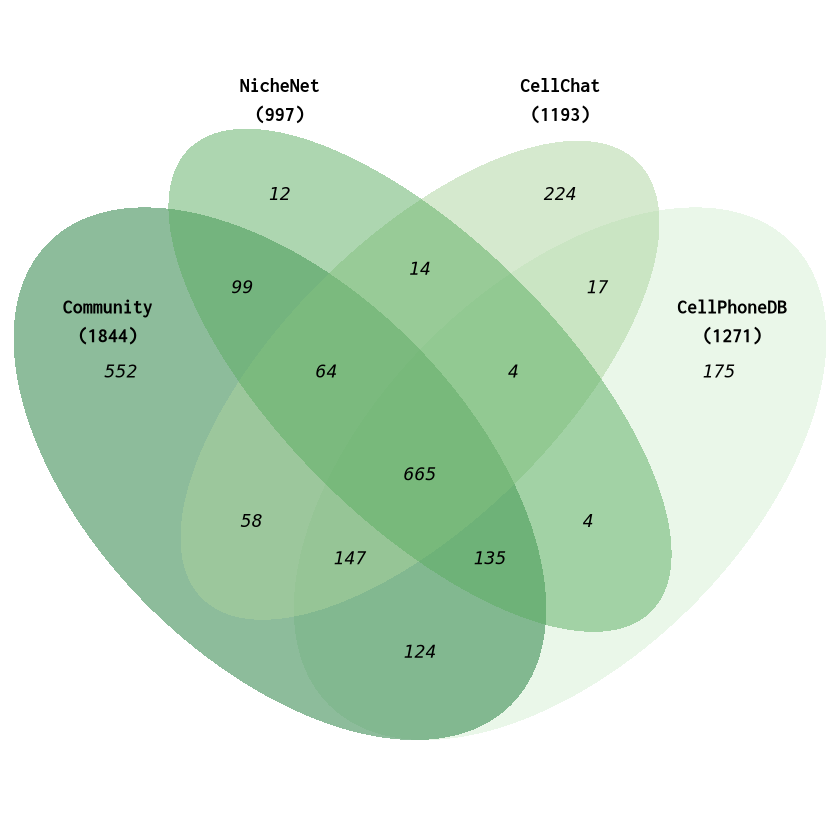

In [12]:
plot_venn(genes_curated, "outs/genes_curated.png")

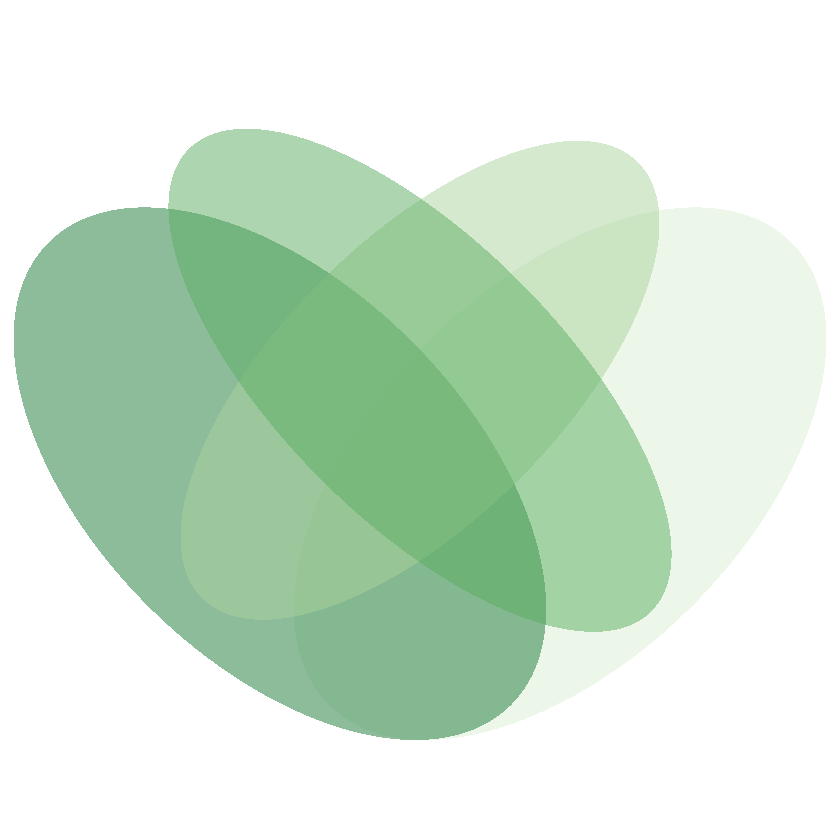

In [13]:
plot_venn_empty(genes_curated, "outs/genes_curated_.png")

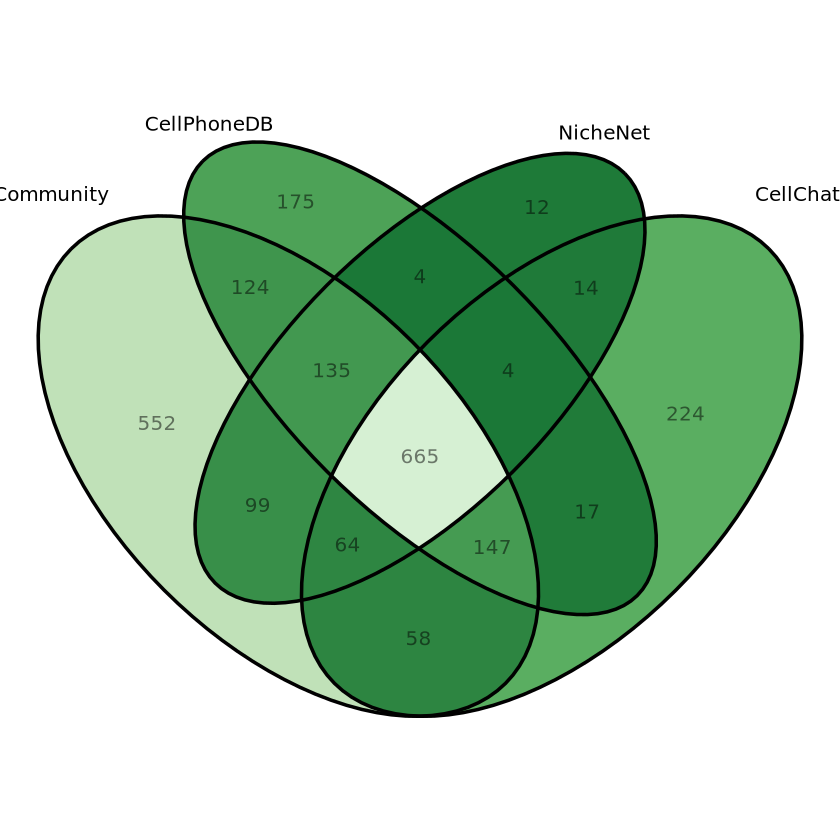

In [14]:
plot_venn_ordered(genes_curated, "outs/genes_curated_ordered.png")

You will spot below, in `genes_curated_predicted` the gene GPR1 appears in all databases except the community one. After checking, I found that previous HGNC Symbols for CMKLR2 Gene is GPR1. The community database includes it as CMKLR2, unlike the others, which still list it as GPR1.

In [15]:
which(genes_curated_predicted$community == FALSE & genes_curated_predicted$CellChat == TRUE & genes_curated_predicted$CPDB == TRUE & genes_curated_predicted$NicheNet == TRUE)

[1] 1530

In [16]:
genes_curated_predicted[1530,]

,community,CPDB,NicheNet,CellChat
,<lgl>,<lgl>,<lgl>,<lgl>
GPR1,FALSE,TRUE,TRUE,TRUE


In [17]:
genes_curated_predicted[rownames(genes_curated_predicted)=="CMKLR2",]

,community,CPDB,NicheNet,CellChat
,<lgl>,<lgl>,<lgl>,<lgl>
CMKLR2,TRUE,FALSE,FALSE,FALSE


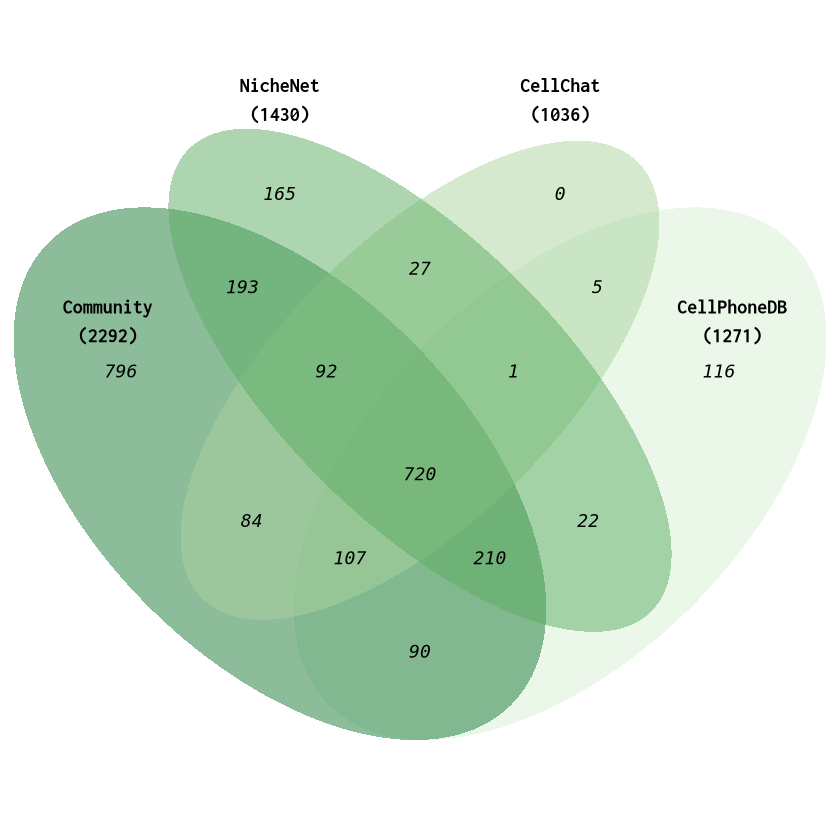

In [18]:
plot_venn(genes_curated_predicted, "outs/genes_curated_predicted.png")

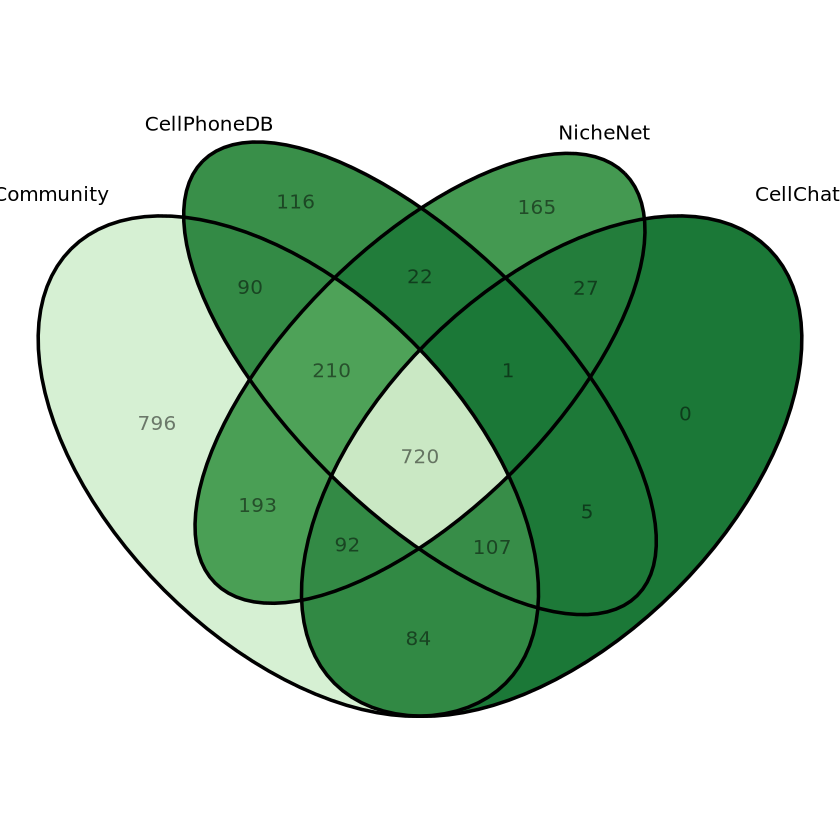

In [19]:
plot_venn_ordered(genes_curated_predicted, "outs/genes_curated_predicted_ordered.png")

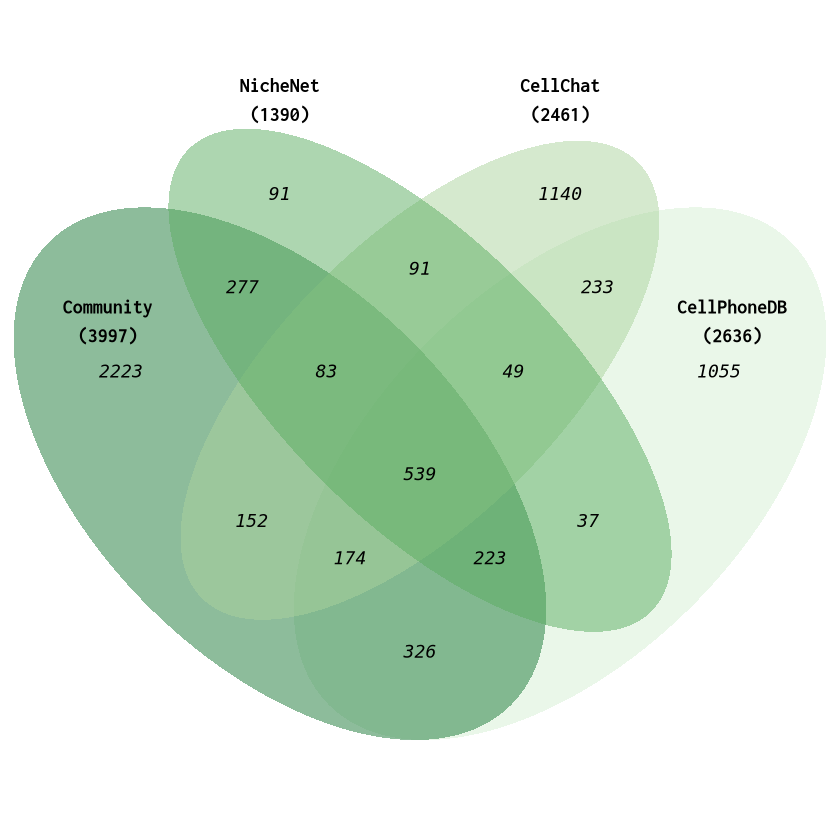

In [20]:
plot_venn(pairs_curated, "outs/pairs_curated.png")

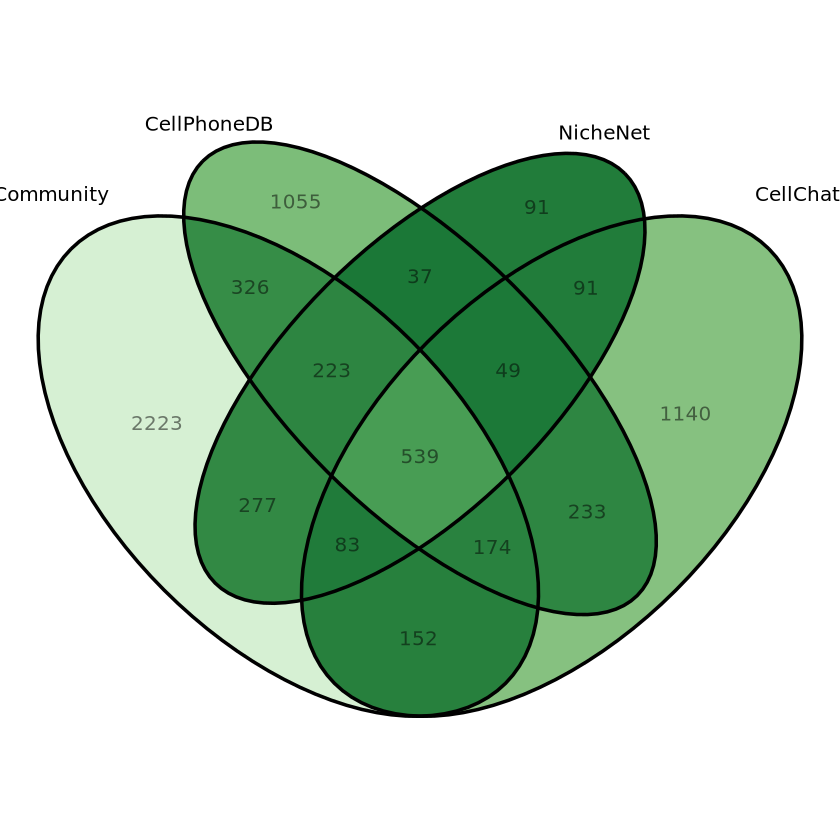

In [21]:
plot_venn_ordered(pairs_curated, "outs/pairs_curated_ordered.png")

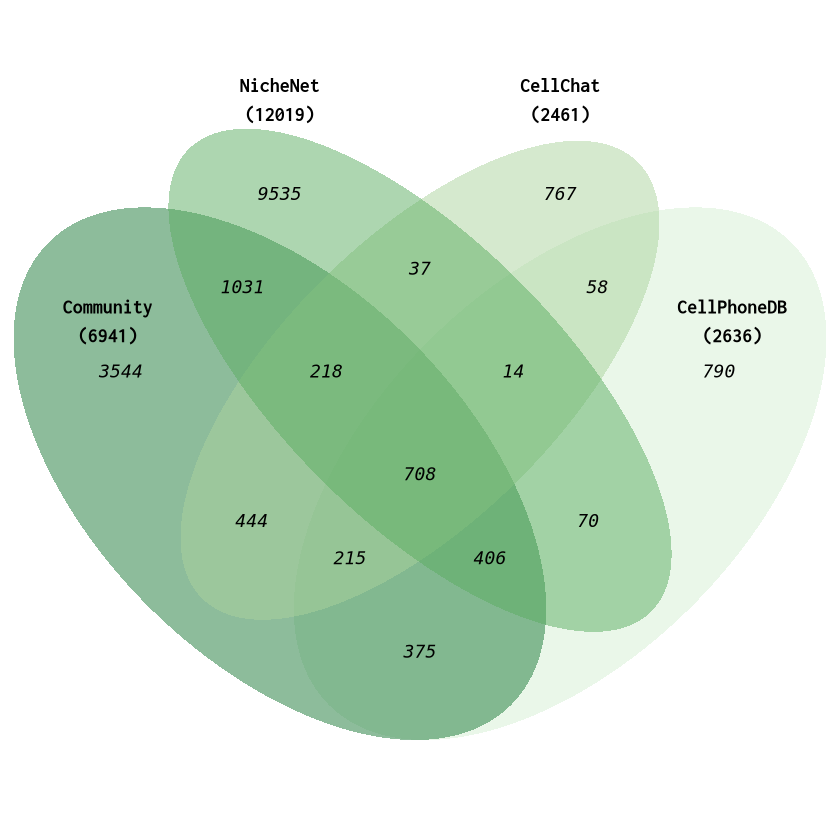

In [22]:
plot_venn(pairs_curated_predicted, "outs/pairs_curated_predicted.png")

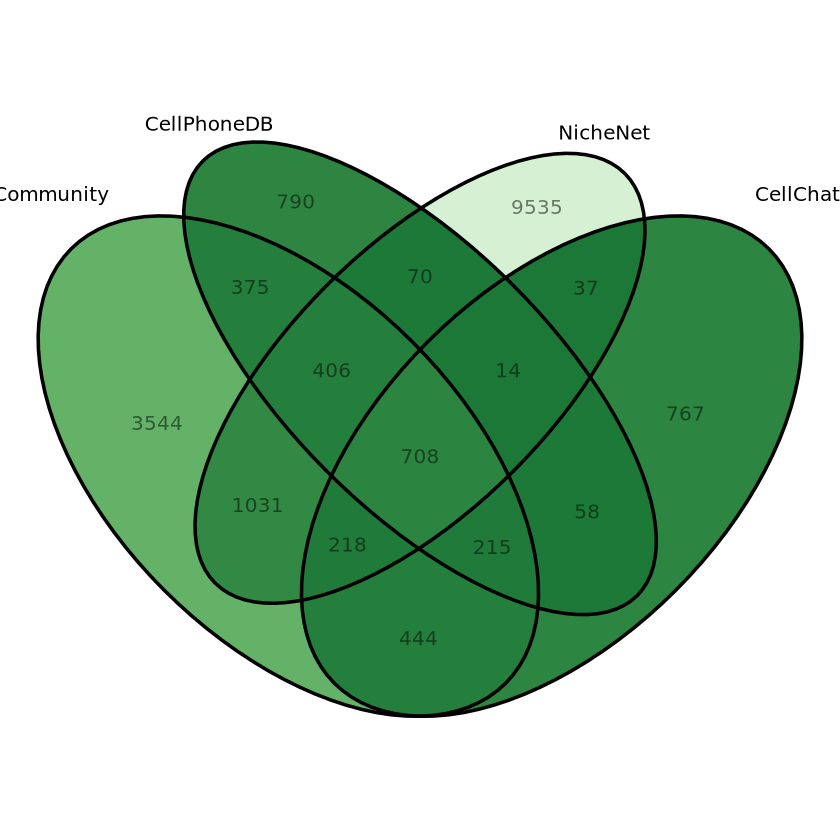

In [23]:
plot_venn_ordered(pairs_curated_predicted, "outs/pairs_curated_predicted_ordered.png")

In [24]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /work/project/ladcol_011/conda_path/miniconda3/envs/cellchat/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] khroma_1.14.0       ggVennDiagram_1.5.2 ggplot2_3.5.1      
[4] VennDiagram_1.7.3   futile.logger_1.4.3

loaded via a namespace (and not attached):
 [1] gtable_0.3.5         jsonlite_1.8.